### Outliers ~
Anomalies, oddity, peculiarity, abnormality, irregularity, inconsistency, incongruity, deviation, aberration

Application:

1) (Credit Card) Fraud Detection

2) abnormalities in HealthCare

Which Machine Learning models are sensitive to outliers ?

#### Not Sensitive / Robuts to Outliers

1) Naive Bayes Classifier

2) SVM

3) Decision Tree Regressor or Classifier

4) Ensemble (Random Forest, XGBoost, GB)

5) KNN (K-Nearest Neighbors)

#### Yes, Sensitive to Outliers

1) Linear Regression

2) Logistic Regression

3) Kmeans Clustering

4) Hierarchial Clustering

5) Density-Based Spatial Clustering Application with Noise (DBSCAN)

6) Principal Component Analysis (PCA)

7) Neural Networks (ANN, CNN, etc)

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Feature Engineering\titanic_train.csv')
# Weblink to download the dataset ~ https://www.kaggle.com/c/titanic/data?select=train.csv
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Checking the Number of Null / Nan values in "Age" column
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

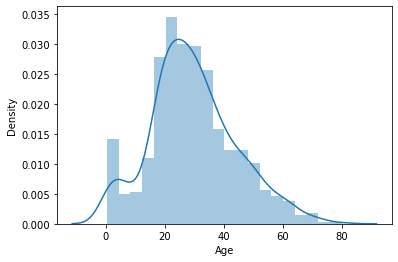

In [5]:
# "distplot" ~ "plot"ting "Dist"irbution an Distribution
sns.distplot(df['Age'].dropna()) # Nan values are dropped

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

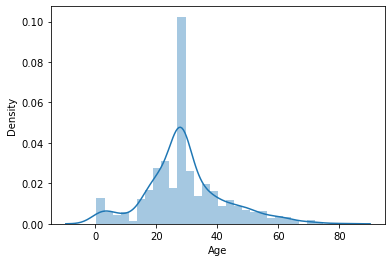

In [6]:
sns.distplot(df['Age'].fillna(df['Age'].median())) # Nan values are replaced with "Median"

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

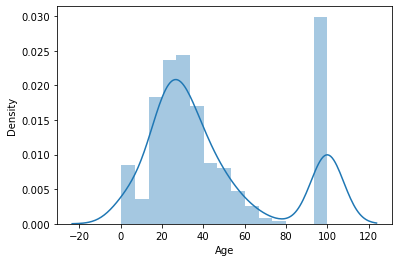

In [7]:
sns.distplot(df['Age'].fillna(100)) # Nan values are replaced with higher NUmber like 100

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

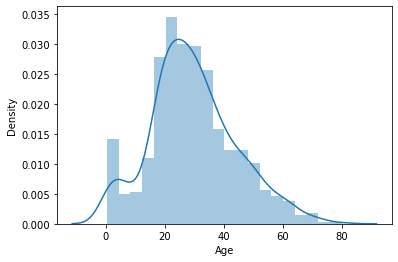

In [8]:
# Again, Checking Outliers without filling Nan Values
sns.distplot(df['Age'])

Text(0, 0.5, 'No. of Passangers')

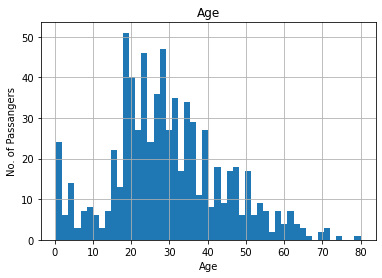

In [9]:
# Plotting HISTOGRAM without filling Nan Values
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passangers')

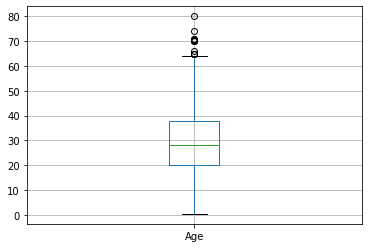

In [10]:
# Drawing Boxplot to analyze the Outliers ~ small circles beyond 100th percentile
figure = df.boxplot(column = "Age")

In [11]:
# Analyzing Statistics of "Age" column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# Assuming that the feature "Age" follows the Gaussian Distribution
# Lets calculate the boundaries which differentiates the Outliers
 
upper_boundary = df["Age"].mean() + 3*df["Age"].std()
lower_boundary = df["Age"].mean() - 3*df["Age"].std()
print("lower_boundary = ",lower_boundary), 
print("mean = ",df["Age"].mean()),
print("upper_boundary = ",upper_boundary)

# As "lower_boundary" is less than "min = 0.420000", So there are no outliers on LHS of the graph

lower_boundary =  -13.88037434994331
mean =  29.69911764705882
upper_boundary =  73.27860964406095


In [13]:
# Computing the (IQR) Inter Quartile Range
# IQR = 75th percentile - 25th Percentile
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [14]:
# Calculating Outliers
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)

print("lower_bridge = ",lower_bridge), # "Age" can not be negative
print("upper_bridge = ",upper_bridge)

lower_bridge =  -6.6875
upper_bridge =  64.8125


In [15]:
# extreme outliers
lower_extreme=df['Age'].quantile(0.25)-(IQR*3) # 1.5 is replaced with 3
upper_extreme=df['Age'].quantile(0.75)+(IQR*3)

print("lower_extreme = ",lower_extreme), # "Age" can not be negative
print("upper_extreme = ",upper_extreme)

lower_extreme =  -33.5
upper_extreme =  91.625


In [16]:
### Let's Analyze another Feature, "Fare"

In [18]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')
# Weblink to download the dataset ~ https://www.kaggle.com/c/titanic/data?select=train.csv
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'No. of Passangers')

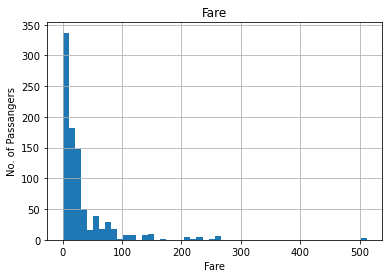

In [19]:
# Checking Outliers without filling Nan Values
# & checking the distribution of data
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passangers')

In [20]:
df.Fare.describe()
# difference between 75th percentile (=31.00) and max (512.329200) is very huge

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

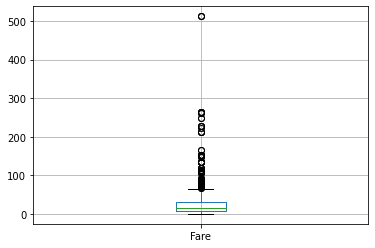

In [21]:
# Drawing Boxplot to analyze the Outliers ~ small circles beyond 100th percentile
figure = df.boxplot(column = "Fare")
# Lot of Outliers are available

In [22]:
# Computing the (IQR) Inter Quartile Range
# IQR = 75th percentile - 25th Percentile
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [23]:
# As the "Fare" data is NOT normally Distributed,
# "lower_boundary" , "upper_boundary = mean + 3*std" should not be calculated

In [24]:
# Calculating Outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)

print("lower_bridge = ",lower_bridge), # "Fare" can not be negative
print("upper_bridge = ",upper_bridge)

lower_bridge =  -26.724
upper_bridge =  65.6344


In [25]:
# extreme outliers
lower_extreme=df['Fare'].quantile(0.25)-(IQR*3) # 1.5 is replaced with 3
upper_extreme=df['Fare'].quantile(0.75)+(IQR*3)

print("lower_extreme = ",lower_extreme), # "Fare" can not be negative
print("upper_extreme = ",upper_extreme)  # still less than (max = 512.329200)

lower_extreme =  -61.358399999999996
upper_extreme =  100.2688
